In [1]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [2]:
#Include depicted data...
#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("./Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("./Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv
ReX= pd.read_csv("./Case_Liu/Trajectories/ReX.csv", header=None) 


In [3]:
fdir = "../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud"
fdir2 = "../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud"
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()
if not os.path.exists(fdir2):
    print('Error: Path does not exist:', fdir2)
    sys.exit()

In [4]:
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
    dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
    density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
    Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points.append((vtk_to_numpy(data.GetPoints().GetData())))
    
points2 =[]
point_data2=[]
point_d2 = []
point_d02 = [];
Reynolds2=[];

for fname in sorted(glob.glob(os.path.join(fdir2, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data2 = (reader.GetOutput())
    point_data2.append(data2.GetPointData())
    point_d2.append(vtk_to_numpy((data2.GetPointData()).GetArray('d')))
    point_d02.append(vtk_to_numpy((data2.GetPointData()).GetArray('d0')))    
#     sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
#     dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
#     density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
    Reynolds2.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points2.append((vtk_to_numpy(data2.GetPoints().GetData())))

Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5107.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5122.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5137.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5152.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5167.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5182.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5197.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5212.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5227.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5242.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5257.vtp
Reading: ../secondaryBreakupBenz

Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6333.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6348.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6363.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6378.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6393.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6408.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6423.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6438.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6453.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6468.vtp
Reading: ../secondaryBreakupBenz-Case4_TAB/VTK/lagrangian/sprayCloud/sprayCloud_6483.vtp
Reading: ../secondary

In [5]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))
    
px2=[]
py2=[]
pz2=[]
for i in range(0, len(points2)):
    px2.append(np.array(points2[i][:,0]))
    py2.append(np.array(points2[i][:,1]))
    pz2.append(np.array(points2[i][:,2]))

In [6]:
diameter =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))
    
diameter2 =[]
Reyn2 =[]
for i in range(0, len(points2)):
    diameter2.append(np.array(point_d2[i]))

In [7]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total,diameter_total))
c_sorted = c[np.argsort(c[:, 0])]

diameter_total2 = np.concatenate( diameter2, axis=0 )
px_total2 = np.concatenate( px2, axis=0 )
py_total2 = np.concatenate( py2, axis=0 )
pz_total2 = np.concatenate( pz2, axis=0 )

c2 = np.column_stack((py_total2, pz_total2,diameter_total2))
c_sorted2 = c2[np.argsort(c2[:, 0])]

In [8]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)

 
splitedSize = round(len(c_sorted[:,2])/50)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]

# Computing the Sauter mean diameter for a specific amount of segments
d32 = pow(c_sorted2[:,2],3)
sigma_d32 = sum(d32)
d22 = pow(c_sorted2[:,2],2)
sigma_d22 = sum(d22)

 
splitedSize2 = round(len(c_sorted[:,2])/50)
d3_split2 = [d32[x:x+splitedSize] for x in range(0, len(d32), splitedSize2)]
d2_split2 = [d22[x:x+splitedSize] for x in range(0, len(d22), splitedSize2)]
d_avgsplit2 = [c_sorted2[:,2][x:x+splitedSize] for x in range(0, len(c_sorted2[:,2]), splitedSize2)]
c_shortx2 = [c_sorted2[:,0][x:x+splitedSize] for x in range(0, len(c_sorted2[:,0]), splitedSize2)]
c_shorty2  = [c_sorted2[:,1][x:x+splitedSize] for x in range(0, len(c_sorted2[:,1]), splitedSize2)]


In [9]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))
    
d322=[];c_avgx2 =[];c_avgy2 =[];d_avg2 =[]

for i in range(0, len(c_shortx2)):
    d322.append(sum(d3_split2[i])/sum(d2_split2[i]))
    c_avgx2.append(sum(c_shortx2[i])/(len(c_shortx2[i])))
    c_avgy2.append(sum(c_shorty2[i])/(len(c_shorty2[i])))
    d_avg2.append(sum(d_avgsplit2[i])/(len(d_avgsplit2[i])))

(-0.0047625, 0.0002375)

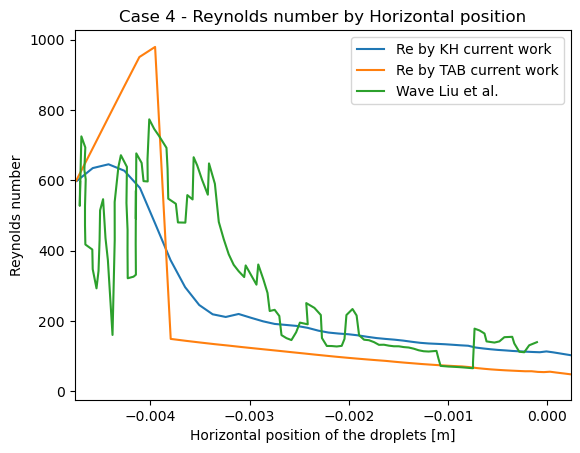

In [10]:
plt.plot(py_total, Reynolds, label='Re by KH current work')
plt.plot(py_total2, Reynolds2, label='Re by TAB current work')
plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Reynolds number by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Reynolds number')
plt.xlim(-0.0047625,0.0002375)

(-0.0047625, 0.0002375)

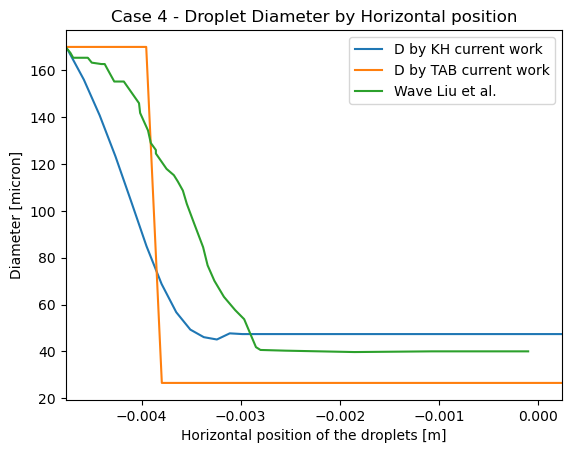

In [11]:
plt.plot(py_total, np.array(diameter) *1e6, label='D by KH current work')
plt.plot(py_total2, np.array(diameter2) *1e6, label='D by TAB current work')
plt.plot(data_C4_SingleD.iloc[:,0]-0.0047625,data_C4_SingleD.iloc[:,1], '-', label='Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Droplet Diameter by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Diameter [micron]')
plt.xlim(-0.0047625,0.0002375)

(0.042, 0.055)

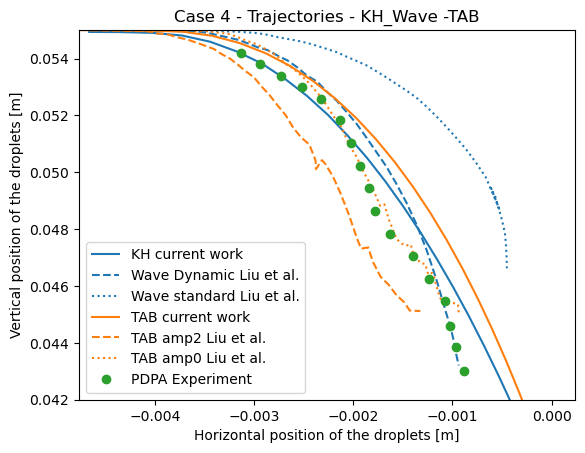

In [12]:
plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--', c='C0', label='Wave Dynamic Liu et al.')
plt.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], ':', c='C0', label='Wave standard Liu et al.')
plt.plot(c_avgx2,c_avgy2, label='TAB current work', c='C1')
plt.plot(TAB_amp02_Traject_Case4.iloc[:,0], TAB_amp02_Traject_Case4.iloc[:,1], '--', c='C1',label='TAB amp2 Liu et al.')
plt.plot(TAB_amp00_Traject_Case4.iloc[:,0],TAB_amp00_Traject_Case4.iloc[:,1], ':', c='C1', label='TAB amp0 Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o', c='C2',label='PDPA Experiment')
plt.legend()
plt.title('Case 4 - Trajectories - KH_Wave -TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0002375)
plt.ylim(0.042,0.055)